In [50]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def polynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [3]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # data data data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. /(X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

In [4]:
X, y = make_data(40)

In [5]:
X.shape


(40, 1)

In [6]:
y.shape

(40,)

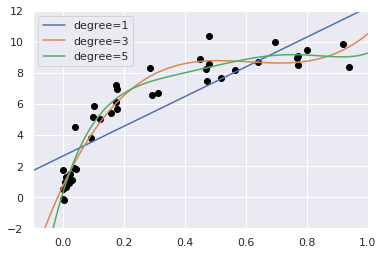

In [53]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(),y, color="black")
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = polynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label="degree={0}".format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc="best")

***
*Which is the best degree?*


In [51]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 25)
train_score, val_score = validation_curve(polynomialRegression(), X, y,
                                          "polynomialfeatures__degree",
                                          degree, cv=7)

3

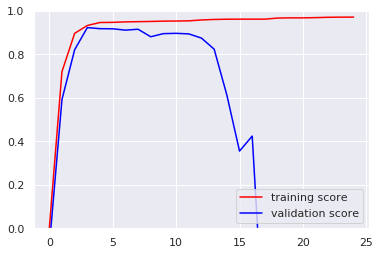

In [52]:
plt.plot(degree, np.median(train_score, 1), color="red", label="training score")
plt.plot(degree, np.median(val_score, 1), color="blue", label="validation score")
plt.ylim(0, 1)
plt.legend(loc="best")

#best
best_degree = degree[np.median(val_score, 1).argmax()]
best_degree


(-0.05673314103942452,
 0.994263633135634,
 -0.7459943120970807,
 10.918045992764213)

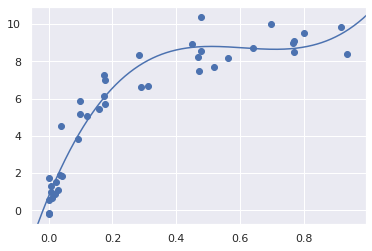

In [58]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = polynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)

***
*Learning Curves*

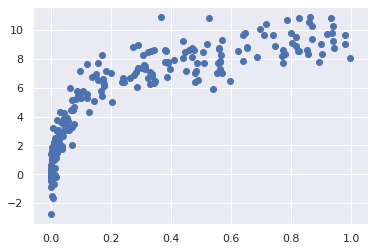

In [87]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2)


In [88]:
degree = np.arange(25)
train_score2, val_score2 = validation_curve(polynomialRegression(), X2, y2,
                                            "polynomialfeatures__degree",
                                            degree, cv=7)

In [89]:
#best
best_degree = degree[np.median(val_score2, 1).argmax()]
best_degree


6

Text(0, 0.5, 'score')

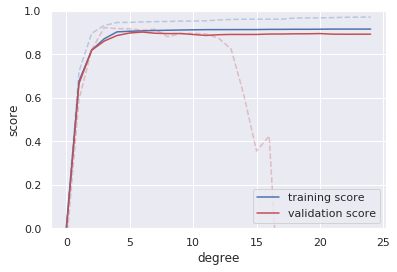

In [90]:
plt.plot(degree, np.median(train_score2, 1), label="training score", color="b")
plt.plot(degree, np.median(val_score2, 1), label="validation score", color="r")
plt.plot(degree, np.median(train_score, 1), linestyle="--", alpha=0.3, color="b")
plt.plot(degree, np.median(val_score, 1), linestyle="--", alpha=0.3, color="r")
plt.legend(loc="best")
plt.ylim(0, 1)
plt.xlabel("degree")
plt.ylabel("score")

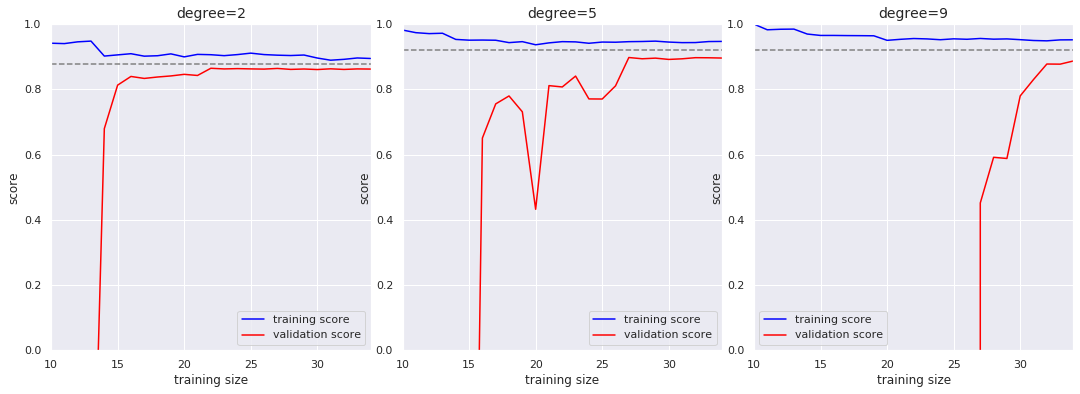

In [110]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 3, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 5 ,9]):
    N, train_lc, val_lc = learning_curve(polynomialRegression(degree),
                                         X, y,
                                         cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))
    
    ax[i].plot(N, np.mean(train_lc, 1), color="blue", label="training score")
    ax[i].plot(N, np.mean(val_lc, 1), color="red", label="validation score")
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color="gray", linestyle="--")
    
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_title("degree={0}".format(degree), size=14)
    ax[i].legend(loc="best")
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    #print(N)

In [114]:
def fit_draw(X,y, degree, size=500):
    X_test = np.linspace(-0.1, 1.1, size)[:, None]
    plt.scatter(X.ravel(), y)
    lim = plt.axis()
    y_test = polynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test)
    plt.axis(lim)

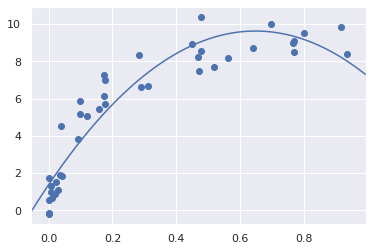

In [115]:
fit_draw(X, y, 2, 2000)

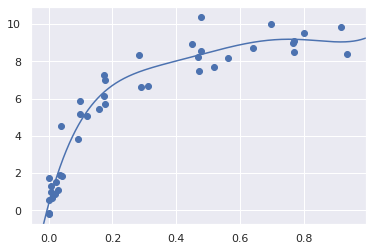

In [116]:
fit_draw(X, y, 5, 2000)

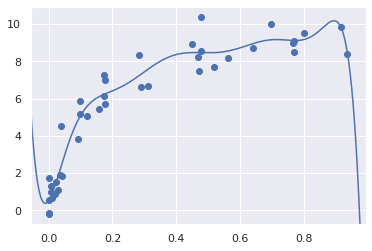

In [117]:
fit_draw(X, y, 9, 2000)

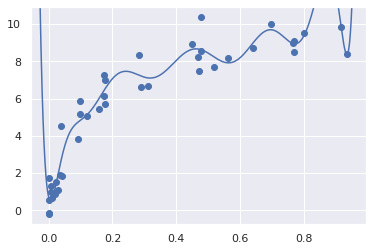

In [120]:
fit_draw(X, y, 12, 2000)